### 设置数据
1. 通过标签（loc）或者位置（iloc）设置值

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('xl/course_participants.xlsx')
df

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [3]:
# 先复制DataFrame，保持原本的DataFrame不变
df2 = df.copy()
df2

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [4]:
df2.loc[0, 'name'] = 'Judy'
df2.loc[2, 'name'] = 'Sophia'
df2

,user_id,name,age,country,score,continent
0,1001,Judy,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Sophia,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [5]:
df2.loc[[0, 2], 'age'] = [7, 5]
df2

,user_id,name,age,country,score,continent
0,1001,Judy,7,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Sophia,5,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [6]:
df2.loc[[0, 2], 'country'] = 'China'
df2.loc[[0, 2], 'continent'] = 'Asia'
df2

,user_id,name,age,country,score,continent
0,1001,Judy,7,China,4.5,Asia
1,1000,John,33,USA,6.7,America
2,1002,Sophia,5,China,3.9,Asia
3,1003,Jenny,12,Germany,9.0,Europe


In [7]:
tf = (df2['age'] < 10) | (df2['country'] == 'China')
df2.loc[tf, 'score'] = 7.5
df2

,user_id,name,age,country,score,continent
0,1001,Judy,7,China,7.5,Asia
1,1000,John,33,USA,6.7,America
2,1002,Sophia,5,China,7.5,Asia
3,1003,Jenny,12,Germany,9.0,Europe


In [8]:
df2.replace('USA', 'U.S.')

,user_id,name,age,country,score,continent
0,1001,Judy,7,China,7.5,Asia
1,1000,John,33,U.S.,6.7,America
2,1002,Sophia,5,China,7.5,Asia
3,1003,Jenny,12,Germany,9.0,Europe


In [9]:
df2.loc[:, 'discount'] = 0
df2.loc[:, 'price'] = [49.9, 49.9, 99.9, 99.9]
df2

,user_id,name,age,country,score,continent,discount,price
0,1001,Judy,7,China,7.5,Asia,0,49.9
1,1000,John,33,USA,6.7,America,0,49.9
2,1002,Sophia,5,China,7.5,Asia,0,99.9
3,1003,Jenny,12,Germany,9.0,Europe,0,99.9


In [10]:
tf = df2['country'] == 'China'
df2.loc[tf, 'discount'] = 0.7
df2.loc[~tf, 'discount'] = 0.9
df2.loc[:, 'price']*=df2['discount']
df2

/var/folders/rp/cc1qy8yj1qs4wb9pgxtgqxh40000gn/T/ipykernel_55246/3634570221.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[tf, 'discount'] = 0.7


,user_id,name,age,country,score,continent,discount,price
0,1001,Judy,7,China,7.5,Asia,0.7,34.93
1,1000,John,33,USA,6.7,America,0.9,44.91
2,1002,Sophia,5,China,7.5,Asia,0.7,69.93
3,1003,Jenny,12,Germany,9.0,Europe,0.9,89.91


In [11]:
df2.loc[:, 'birth year'] = 2024 - df2['age']
df2

,user_id,name,age,country,score,continent,discount,price,birth year
0,1001,Judy,7,China,7.5,Asia,0.7,34.93,2017
1,1000,John,33,USA,6.7,America,0.9,44.91,1991
2,1002,Sophia,5,China,7.5,Asia,0.7,69.93,2019
3,1003,Jenny,12,Germany,9.0,Europe,0.9,89.91,2012


- pandas中的缺失数字用NaN表示（浮点数标准中的Not-a-Number), np.nan
- pd.NaT表示缺少时间
- None表示文本缺失

In [12]:
df2 = df.copy()

In [13]:
df2.loc[1, 'score'] = None
df2.loc[3, :] = None
df2

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,NaN,America
2,1002.0,Tim,41.0,USA,3.9,America
3,NaN,None,NaN,None,NaN,None


In [14]:
# 清除缺失数据的行df.dropna()
df2.dropna()

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
2,1002.0,Tim,41.0,USA,3.9,America


In [15]:
# 清除所有值都缺失的行使用how参数df.dropna(how='all')
df2.dropna(how='all')

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,NaN,America
2,1002.0,Tim,41.0,USA,3.9,America


In [16]:
# 判断每个数值是否是NaN，使用isna()
df2.isna()

,user_id,name,age,country,score,continent
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,False
3,True,True,True,True,True,True


In [17]:
# 使用fillna()将缺失的值替换
df2.fillna({'score': df2['score'].mean()})

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,4.2,America
2,1002.0,Tim,41.0,USA,3.9,America
3,NaN,None,NaN,None,4.2,None


In [18]:
# 使用drop_duplicates()去除重复的数据
df2 = df.copy()
df2.drop_duplicates(['country', 'continent'])

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
3,1003,Jenny,12,Germany,9.0,Europe


In [19]:
rainfall = pd.DataFrame(data = [[300.1, 400.3, 1000.5], [100.2, 300.4, 1100.6]],
                        index = [0, 1],
                        columns = ['City 1', 'City 2', 'City 3'])
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [20]:
rainfall+100

,City 1,City 2,City 3
0,400.1,500.3,1100.5
1,200.2,400.4,1200.6


In [21]:
more_rainfall = pd.DataFrame(data=[[100, 200], [300, 400]],
                             index=[1,2],
                             columns=["City 1", "City 4"])
more_rainfall

,City 1,City 4
1,100,200
2,300,400


In [22]:
# 直接将两个不同形状的DataFrame相加，是索引和列的并集，只有两个表中都有的字段才会相加，其他为NaN
rainfall + more_rainfall

,City 1,City 2,City 3,City 4
0,NaN,NaN,NaN,NaN
1,200.2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [23]:
# add()方法可以将两个不同形状的DataFrame相加，同时使用fll_value=0参数代替NaN
rainfall.add(more_rainfall, fill_value=0)

,City 1,City 2,City 3,City 4
0,300.1,400.3,1000.5,NaN
1,200.2,300.4,1100.6,200.0
2,300.0,NaN,NaN,400.0


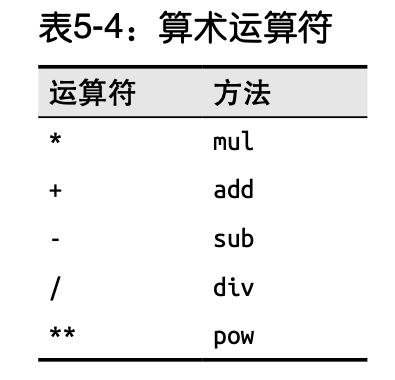

当算式的操作数是一个 DataFrame 和一个 Series 时，默认情况下 Series 会按索引进行广播

In [24]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [25]:
rainfall + rainfall.loc[1, :]  # 将rainfall索引为1的行，广播到所有行上

,City 1,City 2,City 3
0,400.3,700.7,2101.1
1,200.4,600.8,2201.2


In [26]:
# 如果要按列广播到所有列上，需要加上参数axis=0
rainfall.add(rainfall.loc[:, 'City 2'], axis=0)

,City 1,City 2,City 3
0,700.4,800.6,1400.8
1,400.6,600.8,1401.0


### 处理文本列

In [27]:
users = pd.DataFrame(data=[' mArk', 'JOHN', 'Tim', ' jenny'],
                    columns = ['name'])
users

,name
0,mArk
1,JOHN
2,Tim
3,jenny


- 如果只用users.loc[:, 'name'].str.strip().str.capitalize()生成的是一个Series
- 如果想筛选出所有以J开头的名字并定义成一个规则，就需要把整理后的数据定义成DataFrame

In [28]:
# str.strip(),去除开头的空格；str.capitalize(),统一成首字母大写
users_cleaned = pd.DataFrame(users.loc[:, 'name'].str.strip().str.capitalize())
users_cleaned

,name
0,Mark
1,John
2,Tim
3,Jenny


In [29]:
tf = users_cleaned['name'].str.startswith('J')
users_cleaned.loc[tf, 'name']

1     John
3    Jenny
Name: name, dtype: object

In [30]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


map()方法可以将函数应用到每一个元素上。

lambda函数，匿名函数（没有函数名的函数），格式：lambda 参数：返回值。适用于表达式简单的函数

In [35]:
rainfall.map(lambda x: f"{x:,.2f}")

,City 1,City 2,City 3
0,300.10,400.30,"1,000.50"
1,100.20,300.40,"1,100.60"


In [36]:
def format_string(x):
    return f"{x:,.3f}"
rainfall.map(format_string)

,City 1,City 2,City 3
0,300.100,400.300,"1,000.500"
1,100.200,300.400,"1,100.600"


在pandas中，使用loc和iloc返回的是视图还是副本很难确定。（视图可以理解为是原数据，副本就是克隆数据）

原则：
- 在原本的 DataFrame 中设置值，而不是在切片生成的 DataFrame 中操作。
- 如果你想在切片后获得一个单独的 DataFrame，则应该显式地调用 copy。例如selection = df.loc[:, ["country", "continent"]].copy()
- 诸如 df.dropna()或 df.sort_value("column_name")这样的 DataFrame 方法总是返回副本